In [1]:
import yaml
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_name = '000000000605'

In [3]:
label_name_yml = 'yolov5/data/coco128.yaml'
# load label names 
data = yaml.safe_load(open(label_name_yml))
labels_dict = data['names']

In [4]:
# load a sample img
img = cv2.imread(f'coco128/images/train2017/{image_name}.jpg')
img.shape

(480, 640, 3)

In [5]:
os.makedirs('overlayed', exist_ok=True)

In [69]:
def overlay_masks(masks_dir  , image_path):
    image= cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masks = os.listdir(masks_dir)
    image_name = image_path.split('/')[-1].split('.')[0]
    os.makedirs(f'overlayed/{image_name}', exist_ok=True)
    for mask_name in masks:
        mask_path = os.path.join(masks_dir, mask_name)
        mask = cv2.imread(mask_path)
        # mask is a 3 channel image, we only need one channel which is binary
        mask = mask[:,:,0]
        mask = mask/255

        # overlay mask on image
        overlay = image.copy()
        overlay[:,:,0] = mask*image[:,:,0]
        overlay[:,:,1] = mask*image[:,:,1]
        overlay[:,:,2] = mask*image[:,:,2]

        # save overlayed image
        cv2.imwrite(f'overlayed/{image_name}/{mask_name}', overlay)


In [70]:
overlay_masks('Masks/Masks' , f'coco128/images/train2017/{image_name}.jpg')

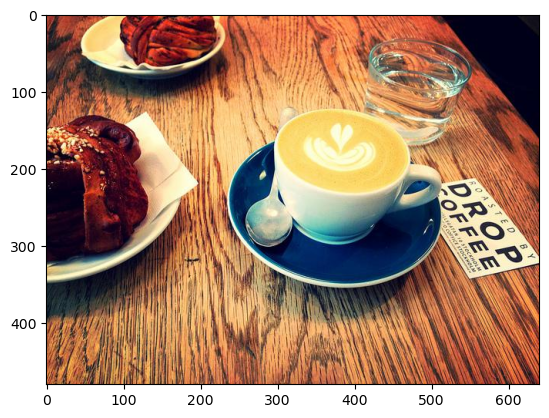

In [6]:
plt.imshow(cv2.cvtColor(cv2.imread(f'coco128/images/train2017/{image_name}.jpg') , cv2.COLOR_BGR2RGB))

In [72]:
# apply yolov5 on the overlayed images
!python yolov5/detect.py --weights yolov5/yolov5s.pt --conf 0.25 --source 'overlayed/{image_name}' --save-txt --dir-path 'detections_overlayed/${image_name}' --save-conf --nosave

detect: weights=['yolov5/yolov5s.pt'], source=overlayed/000000000208, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=True, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, dir_path=detections_overlayed/$000000000208
fatal: cannot change to '/Users/sarthak/Desktop/IIIT': No such file or directory
YOLOv5 🚀 2024-3-19 Python-3.9.15 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/4998 /Users/sarthak/Desktop/IIIT Course Work/Sem6/CV/Project/overlayed/000000000208/mask0.png: 480x640 1 person, 135.7ms
image 2/4998 /Users/sarthak/Desktop/IIIT Course Work/Sem6/CV/Project/overlayed/000000000208/mask1.png: 480x640 

In [73]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --conf 0.25 --source 'coco128/images/train2017/{image_name}.jpg' --save-txt --dir-path 'detections' --save-conf

detect: weights=['yolov5/yolov5s.pt'], source=coco128/images/train2017/000000000208.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, dir_path=detections
fatal: cannot change to '/Users/sarthak/Desktop/IIIT': No such file or directory
YOLOv5 🚀 2024-3-19 Python-3.9.15 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /Users/sarthak/Desktop/IIIT Course Work/Sem6/CV/Project/coco128/images/train2017/000000000208.jpg: 480x640 1 person, 1 person, 1 person, 152.2ms
Speed: 1.3ms pre-process, 152.2ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640

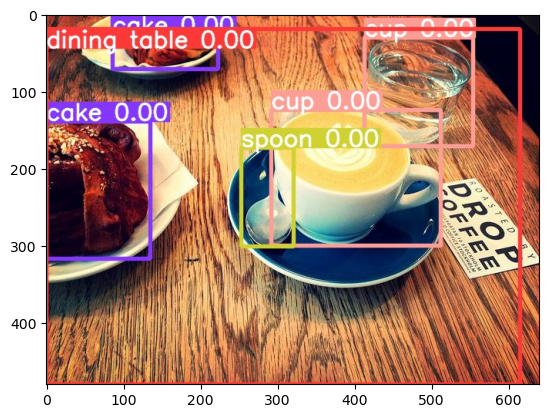

In [7]:
'''Detections image'''
plt.imshow(cv2.cvtColor(cv2.imread(f'detections/000000000605.jpg') , cv2.COLOR_BGR2RGB))

In [28]:
detectiontxt = f'detections/labels/{image_name}.txt'
# load the detection results
detection = np.loadtxt(detectiontxt)

# get the class name using labels dict

class_names = [labels_dict[det[0]] for det in detection]
class_names

['cake', 'cup', 'cake', 'cup', 'dining table', 'spoon']

In [29]:
print(detection[3])

[4.10000e+01 6.28125e-01 4.41667e-01 3.43750e-01 3.66667e-01 3.71738e-04
 1.19249e-04 1.79545e-04 1.13721e-04 1.48689e-04 1.08345e-04 1.10340e-04
 1.44632e-04 7.62763e-05 1.64604e-04 1.24162e-04 1.53602e-04 2.30070e-04
 1.27066e-04 1.00720e-04 4.25686e-04 1.10330e-04 1.16548e-04 1.35755e-04
 1.78248e-04 1.56784e-04 1.23468e-04 3.95564e-04 1.38722e-04 1.63399e-04
 1.18945e-04 2.20293e-04 1.66551e-04 1.93947e-04 3.82007e-04 9.85120e-05
 1.63202e-04 1.79462e-04 8.98564e-05 1.01320e-04 1.25133e-04 1.36362e-04
 1.64120e-04 1.18398e-04 2.90354e-03 1.75732e-03 8.92873e-01 3.83473e-04
 2.42783e-04 1.55486e-03 1.57156e-02 1.80491e-04 2.28402e-04 2.32360e-04
 4.11442e-04 3.35843e-04 1.55756e-04 8.78568e-05 1.59275e-04 2.73164e-04
 3.00532e-04 3.50022e-04 1.35629e-04 1.62168e-04 1.10914e-04 3.27820e-03
 2.51491e-04 1.65425e-04 4.18389e-04 3.51261e-04 1.60521e-04 1.53172e-04
 1.79188e-04 1.82390e-04 2.74913e-04 2.65760e-04 3.26114e-04 2.27229e-04
 2.35960e-04 1.41386e-04 8.90272e-04 2.40517e-04 1.

In [30]:
our_detection = detection[3]
# # take roi using cv2.selectROI
# roi = cv2.selectROI(img)

In [31]:
# Now lets load overlayed detections
detection_path = f'detections_overlayed/{image_name}/labels'
dets = os.listdir(detection_path)
# sort the detections
dets = sorted(dets, key=lambda x: x.split('.')[0])

masked_detections = {}
for det in dets:
    detections = np.loadtxt(os.path.join(detection_path, det))
    mask_det = []
    # detection is every new line in the txt file , each line contains 85 values , append them as a list to mask_det
    for detection in detections:
        mask_det.append(np.array(detection))
    if len(mask_det) == 85:
        # it is a single array , so make mask_det a 2d list
        mask_det = [mask_det]
    mask_name = det.split('.')[0][4:]
    # append mask_det as a list of detections to masked_detections
    # masked_detections.append(mask_det)
    # add with mask name 
    masked_detections[mask_name] = mask_det

In [32]:
masked_detections.keys()

dict_keys(['0', '1', '1001', '1002', '1003', '1004', '1008', '1009', '1014', '1018', '1020', '1023', '1028', '1032', '1039', '1040', '1043', '1044', '1048', '105', '1052', '106', '1060', '1062', '1066', '1067', '107', '1072', '1073', '1074', '1076', '1078', '108', '1084', '1088', '1091', '1093', '1097', '1098', '11', '110', '1100', '1106', '1107', '111', '1111', '1112', '1114', '1117', '1118', '112', '1122', '1124', '1125', '1129', '113', '1130', '1134', '1135', '1137', '1138', '1141', '115', '1152', '1153', '1159', '116', '1161', '1162', '1163', '1164', '1167', '1169', '1170', '1173', '1178', '1179', '118', '1180', '1186', '1187', '1188', '119', '1191', '1192', '1194', '1196', '1200', '1204', '1207', '1209', '1214', '1215', '1216', '1217', '122', '1225', '1226', '123', '1230', '1233', '1236', '1240', '1242', '1250', '1256', '1257', '1258', '1261', '1265', '1267', '1268', '1269', '1271', '1274', '1277', '1278', '128', '1281', '1286', '1289', '1290', '1292', '1295', '1297', '1306', '131

In [33]:
len(masked_detections)

1987

In [34]:
h = 480 
w = 640

In [35]:
def compute_iou(box1 , box2):
    # first scale the values
    bbox1 = [0,0,0,0]
    bbox2 = [0,0,0,0]

    bbox1[0] = box1[1]*w
    bbox1[1] = box1[2]*h
    bbox1[2] = box1[3]*w
    bbox1[3] = box1[4]*h

    bbox2[0] = box2[1]*w
    bbox2[1] = box2[2]*h
    bbox2[2] = box2[3]*w
    bbox2[3] = box2[4]*h

    # the detections are in x,y,w,h format
    # convert to x1,y1,x2,y2


    bbox1 = [bbox1[0] - bbox1[2]/2 , bbox1[1] - bbox1[3]/2 , bbox1[0] + bbox1[2]/2 , bbox1[1] + bbox1[3]/2]
    bbox2 = [bbox2[0] - bbox2[2]/2 , bbox2[1] - bbox2[3]/2 , bbox2[0] + bbox2[2]/2 , bbox2[1] + bbox2[3]/2]

    bbox1 = np.asarray(bbox1)
    bbox2 = np.asarray(bbox2)

    # Now compute iou
    # x1 = max(bbox1[0], bbox2[0])
    # y1 = max(bbox1[1], bbox2[1])
    # x2 = min(bbox1[2], bbox2[2])
    # y2 = min(bbox1[3], bbox2[3])
    tl = np.vstack([bbox1[:2], bbox2[:2]]).max(axis=0)
    br = np.vstack([bbox1[2:], bbox2[2:]]).min(axis=0)


    intersection = np.prod(br - tl) * np.all(tl < br).astype(float)
    # intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area1 = np.prod(bbox1[2:] - bbox1[:2])
    area2 = np.prod(bbox2[2:] - bbox2[:2])
    iou = intersection / float(area1 + area2 - intersection)

    return iou

In [36]:
iou = compute_iou(our_detection , masked_detections['0'][0])
iou

0.2791881979697162

In [37]:
def compute_class_similarity_score(box1 , box2):
    # create a numpy array with 85 zeros
    cbox1 = np.array(box1.copy()[5:])
    cbox2 = np.array(box2.copy()[5:])

    # compute cosine similarity
    dot_product = np.dot(cbox1, cbox2)
    norm_box1 = np.linalg.norm(cbox1)
    norm_box2 = np.linalg.norm(cbox2)
    return dot_product / (norm_box1 * norm_box2)

In [38]:
cs = compute_class_similarity_score(our_detection , masked_detections['0'][0])
cs

0.041001540584146366

In [39]:
def compute_detection_score(box1 , box2):
    iou = compute_iou(box1 , box2)
    cs = compute_class_similarity_score(box1 , box2)
    return iou*cs

In [40]:
sc = compute_detection_score(our_detection , masked_detections['0'][0])
sc

0.01144714622967001

In [41]:
# Now , for each mask , calculate the maximum similarity score with the original detection
similarity_scores = {}
for name in masked_detections.keys():
    mask_det = masked_detections[name]
    max_score = 0
    for det in mask_det:
        score = compute_detection_score(our_detection , det)
        if score > max_score:
            max_score = score
    similarity_scores[name] = max_score


In [42]:
similarity_scores['1']

1.9641239840323674e-06

In [43]:
# Now produce the final heatmap using the similarity scores and weighted masks
masks_dir = 'Masks/Masks'
image_path = f'coco128/images/train2017/{image_name}.jpg'
image= cv2.imread(image_path)

weighted_mask = np.zeros((h,w))
# load the masks
masks = os.listdir(masks_dir)
# sort it
masks = sorted(masks, key=lambda x: x.split('.')[0])
for name in similarity_scores.keys():
    mask_path = os.path.join(masks_dir, 'mask' + name + '.png')
    mask = cv2.imread(mask_path)
    # mask is a 3 channel image, we only need one channel which is binary
    mask = mask[:,:,0]
    mask = mask/255
    weighted_mask += mask*similarity_scores[name]


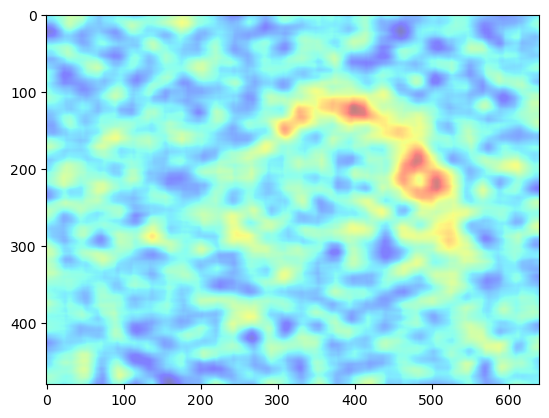

In [44]:
plt.imshow(weighted_mask , cmap='jet' , alpha=0.5)

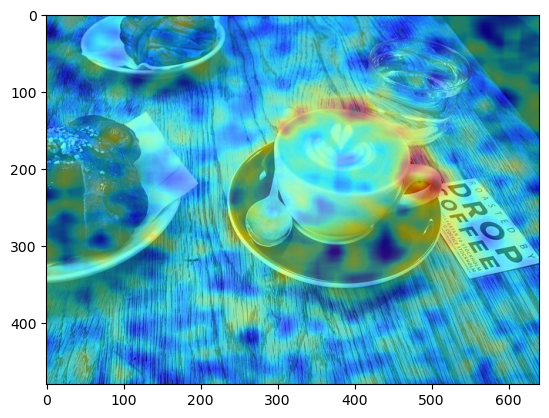

In [45]:
img = cv2.imread(f'coco128/images/train2017/{image_name}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# draw out detection on top of image

plt.imshow(img[:, :, ::-1])
plt.imshow(weighted_mask, cmap='jet', alpha=0.5)
